In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

plt.style.use("dark_background")

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.data.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
N, D = X_train.shape

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Y_train.shape

(381,)

In [ ]:
X_train = torch.from_numpy(X_train.reshape(-1, D).astype(np.float32))
X_test  = torch.from_numpy(X_test.reshape(-1, D).astype(np.float32))
Y_train = torch.from_numpy(Y_train.reshape(-1, 1).astype(np.float32))
Y_test  = torch.from_numpy(Y_test.reshape(-1, 1).astype(np.float32))

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([381, 30])
torch.Size([188, 30])
torch.Size([381, 1])
torch.Size([188, 1])


In [ ]:
# model = nn.Sequential(
#     nn.Linear(D, 1),
#     nn.Sigmoid()
# )
#criterion = nn.BCELoss()

model = nn.Linear(D, 1)
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters())
train_losses = []
val_losses = []

train_acc = []
val_acc = []

n_epochs = 1000

for i in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    loss.backward()
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, Y_test)
    train_losses.append(loss.item())
    val_losses.append(loss.item())

    outputs = model(X_train)
    curr_train_acc = np.mean(np.round(outputs.detach().numpy()) == Y_train.detach().numpy())
    curr_val_acc = np.mean(np.round(outputs_test.detach().numpy()) == Y_test.detach().numpy())
    train_acc.append(curr_train_acc)
    val_acc.append(curr_val_acc)

    print(f"Epoch: {i+1}/{n_epochs} /............................................/ Train Loss: {loss.item():.4f}, Val Loss: {loss_test.item():.4f}")

Epoch: 1/1000 /............................................/ Train Loss: 0.7175, Val Loss: 0.7307
Epoch: 2/1000 /............................................/ Train Loss: 0.7105, Val Loss: 0.7232
Epoch: 3/1000 /............................................/ Train Loss: 0.7036, Val Loss: 0.7158
Epoch: 4/1000 /............................................/ Train Loss: 0.6967, Val Loss: 0.7085
Epoch: 5/1000 /............................................/ Train Loss: 0.6899, Val Loss: 0.7013
Epoch: 6/1000 /............................................/ Train Loss: 0.6832, Val Loss: 0.6941
Epoch: 7/1000 /............................................/ Train Loss: 0.6766, Val Loss: 0.6871
Epoch: 8/1000 /............................................/ Train Loss: 0.6700, Val Loss: 0.6801
Epoch: 9/1000 /............................................/ Train Loss: 0.6635, Val Loss: 0.6732
Epoch: 10/1000 /............................................/ Train Loss: 0.6571, Val Loss: 0.6664
Epoch: 11/1000 /...

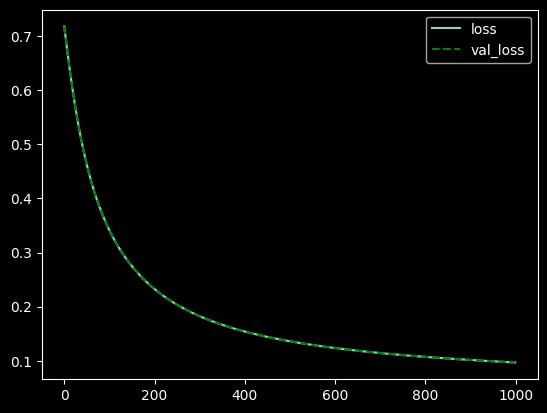

In [ ]:
plt.plot(train_losses, label="loss")
plt.plot(val_losses,"g--" ,  label="val_loss")
plt.legend()

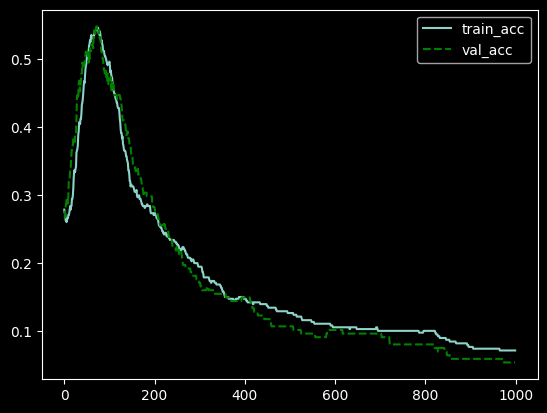

In [ ]:
plt.plot(train_acc, label="train_acc")
plt.plot(val_acc, "g--" ,  label="val_acc")
plt.legend()

In [ ]:
train_pred = model(X_train)
val_pred = model(X_test)

with torch.no_grad():
    train_acc = np.mean(np.round(train_pred.numpy()) == Y_train.numpy())
    val_acc = np.mean(np.round(val_pred.numpy()) == Y_test.numpy())

print(train_acc, val_acc)

0.07086614173228346 0.05319148936170213


In [ ]:
X_test

tensor([[-0.4794, -0.1444, -0.4573,  ..., -0.1953,  0.1991,  0.2246],
        [ 1.3279,  0.4947,  1.2708,  ...,  0.9979, -0.5328, -0.9994],
        [ 0.3558,  0.0631,  0.3805,  ...,  0.5740, -0.0807, -0.1895],
        ...,
        [-0.1330,  0.3815, -0.0870,  ...,  0.6387,  0.4868,  1.7879],
        [ 0.0793,  1.3624,  0.1411,  ...,  0.0976,  0.4726,  1.0629],
        [-0.1805, -1.1442, -0.1984,  ...,  0.2255,  0.1406, -0.6199]])

In [ ]:
Y_test

tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
      

In [ ]:
model(X_test)

tensor([[  1.2694],
        [ -5.6077],
        [ -3.0737],
        [  3.8691],
        [  5.2425],
        [-13.7661],
        [-10.5604],
        [ -1.5760],
        [  0.1413],
        [  4.0836],
        [  1.9415],
        [ -2.0000],
        [  2.9861],
        [ -0.9426],
        [  4.0567],
        [ -3.4854],
        [  3.5012],
        [  6.3583],
        [  8.7846],
        [ -7.2606],
        [  1.2714],
        [  2.6461],
        [-10.4958],
        [  6.2344],
        [  4.0485],
        [  4.1457],
        [  3.6026],
        [  2.9506],
        [  3.2635],
        [ -7.1004],
        [  4.1176],
        [  5.3870],
        [  3.7335],
        [  3.2039],
        [  5.3245],
        [  3.7519],
        [ -0.6036],
        [  3.9238],
        [ -4.6239],
        [  1.6122],
        [  4.9193],
        [ -3.6596],
        [  2.9358],
        [  4.1262],
        [  2.3317],
        [  2.1801],
        [  4.2598],
        [  5.1703],
        [  1.9557],
        [  3.8448],
